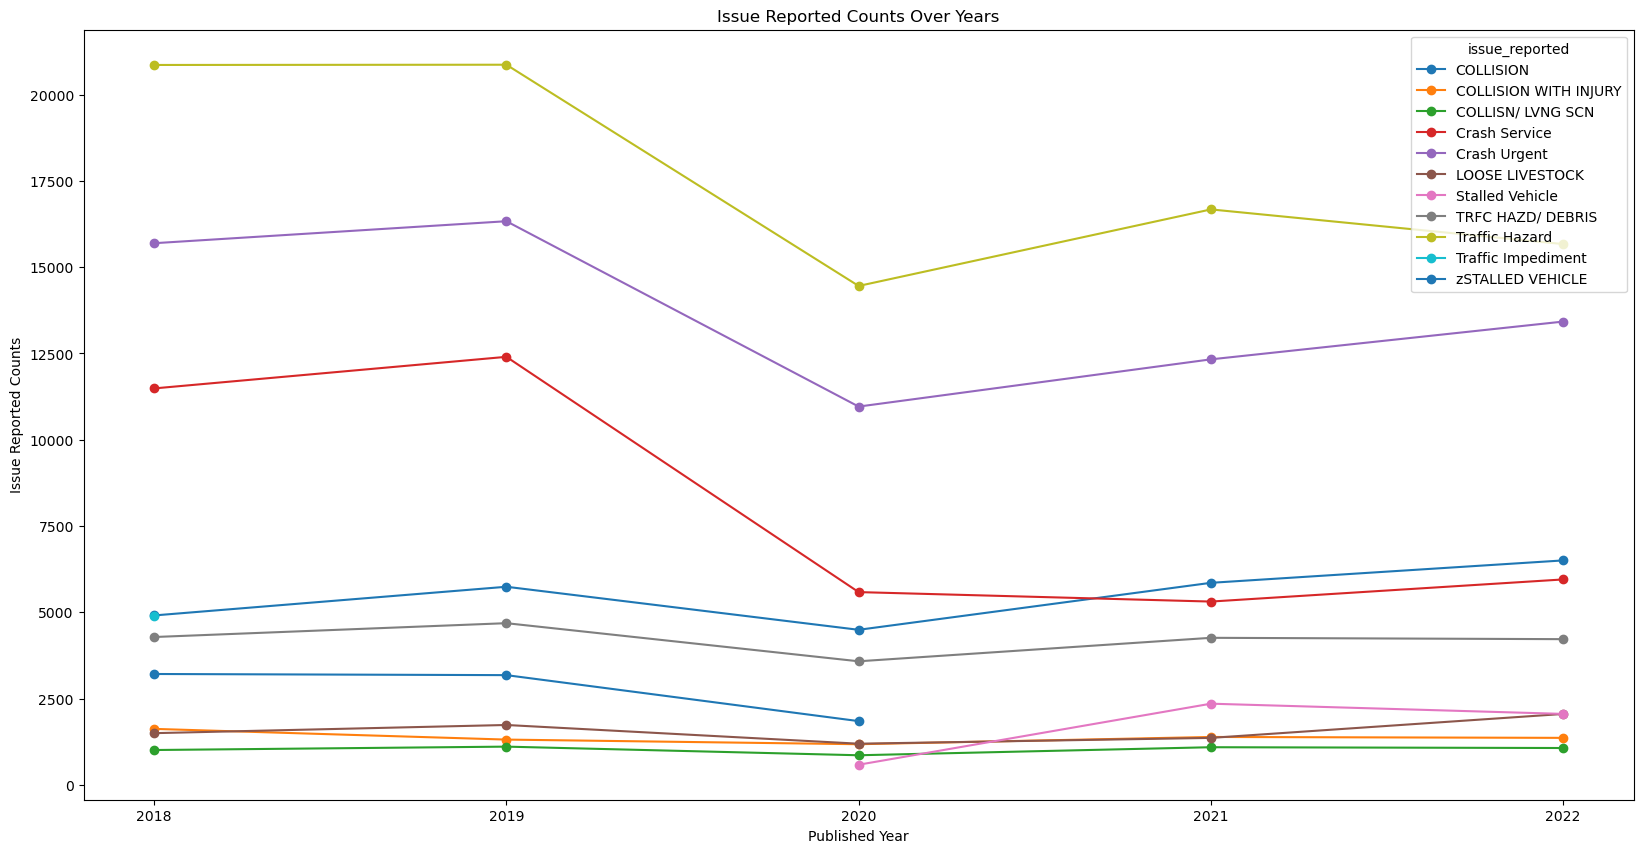

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from datetime import datetime as dt
import datetime

traffic_df = pd.read_csv("Real-Time_Traffic_Incident_Reports.csv")  

traffic_df['publish_date'] = pd.to_datetime(traffic_df['published_date']).dt.date
traffic_df['published_year'] = pd.to_datetime(traffic_df['publish_date']).dt.year

# Filter out the rows with years 2017 and 2023
filtered_traffic_df = traffic_df[(traffic_df['published_year'] != 2017) & (traffic_df['published_year'] != 2023)]

issue_report_counts = filtered_traffic_df['issue_reported'].value_counts()

counts_per_year = filtered_traffic_df.groupby(['published_year', 'issue_reported']).size().reset_index(name='issue_counts')

issuereported_grt_500 = counts_per_year[counts_per_year['issue_counts'] > 500]

pivot_table = issuereported_grt_500.pivot(index='published_year', columns='issue_reported', values='issue_counts')


ax = pivot_table.plot(kind='line', marker='o', figsize=(20, 10))

plt.xlabel('Published Year')
plt.ylabel('Issue Reported Counts')
plt.title('Issue Reported Counts Over Years')

years = pivot_table.index.astype(int)
ax.set_xticks(years)



plt.show()
